<a href="https://colab.research.google.com/github/MuskaansGithup/CodSoft_3/blob/main/Movie_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOADING OF DATASET

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [127]:
df= pd.read_csv("IMDb Movies India.csv", encoding='latin-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [128]:
df.shape

(15509, 10)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


MISSING VALUES

In [130]:
missing=df.isnull()
for column in df:
  print(missing[column].value_counts())
  print(" ")

Name
False    15509
Name: count, dtype: int64
 
Year
False    14981
True       528
Name: count, dtype: int64
 
Duration
True     8269
False    7240
Name: count, dtype: int64
 
Genre
False    13632
True      1877
Name: count, dtype: int64
 
Rating
False    7919
True     7590
Name: count, dtype: int64
 
Votes
False    7920
True     7589
Name: count, dtype: int64
 
Director
False    14984
True       525
Name: count, dtype: int64
 
Actor 1
False    13892
True      1617
Name: count, dtype: int64
 
Actor 2
False    13125
True      2384
Name: count, dtype: int64
 
Actor 3
False    12365
True      3144
Name: count, dtype: int64
 


HANDLING MISSING VALUES & CORRECTING THE DATA FORMAT

In [131]:
# Handling and Formating Year Column
df=df.dropna(subset='Year')
df['Year'] = df['Year'].astype(str).str.replace('-', '').str.replace('.0','').astype(int)
df.head()

<ipython-input-131-9a4bc7025a93>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [132]:
# For Duration Column
df['Duration'] = df['Duration'].astype(str).str.replace('min', '')
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')
df['Duration'].fillna(df['Duration'].mean(), inplace=True)
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90.0,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105.0,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [133]:
#Votes Column
df['Votes'] = df['Votes'].astype(str).str.replace(',', '')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Votes'].fillna(df['Votes'].mean(), inplace=True)
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8.000000,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90.0,"Drama, Musical",NaN,1938.520394,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35.000000,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105.0,Drama,NaN,1938.520394,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827.000000,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [134]:
#Rating Column
df['Rating'].fillna(df['Rating'].mean(), inplace=True)
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.000000,8.000000,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90.0,"Drama, Musical",5.841621,1938.520394,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110.0,"Comedy, Romance",4.400000,35.000000,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105.0,Drama,5.841621,1938.520394,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.700000,827.000000,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [135]:
# Handling Missing Values for Director, Actor 1, Actor 2, Actor 3
col=['Genre','Director','Actor 1','Actor 2','Actor 3']
for i in col:
  df[i].fillna(df[i].mode()[0], inplace=True)
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.000000,8.000000,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90.0,"Drama, Musical",5.841621,1938.520394,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110.0,"Comedy, Romance",4.400000,35.000000,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105.0,Drama,5.841621,1938.520394,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.700000,827.000000,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [136]:
df.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


DESCRIPTIVE STATISTICS

In [137]:
df.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,14981,14981.000000,14981.000000,14981,14981.000000,14981.000000,14981,14981,14981,14981
unique,13344,NaN,NaN,474,NaN,NaN,5664,4535,4702,4645
top,Anjaam,NaN,NaN,Drama,NaN,NaN,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,NaN,NaN,4488,NaN,NaN,555,1646,2280,2998
mean,NaN,1987.012215,128.467604,NaN,5.841621,1938.520394,NaN,NaN,NaN,NaN
std,NaN,25.416689,19.882494,NaN,1.004592,8435.294955,NaN,NaN,NaN,NaN
min,NaN,1913.000000,2.000000,NaN,1.100000,5.000000,NaN,NaN,NaN,NaN
25%,NaN,1968.000000,128.467604,NaN,5.841621,47.000000,NaN,NaN,NaN,NaN
50%,NaN,1991.000000,128.467604,NaN,5.841621,1938.520394,NaN,NaN,NaN,NaN
75%,NaN,2009.000000,130.000000,NaN,6.100000,1938.520394,NaN,NaN,NaN,NaN


DETECITNG AND HANDLING OUTLIERS

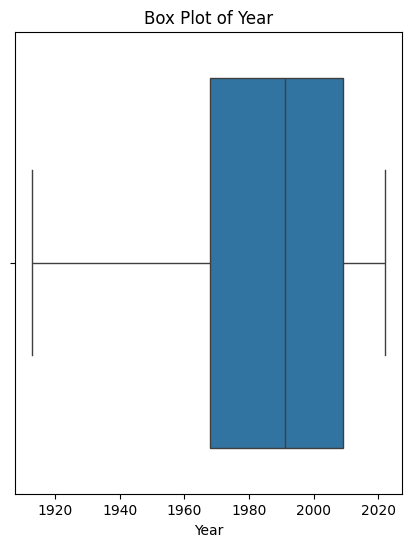

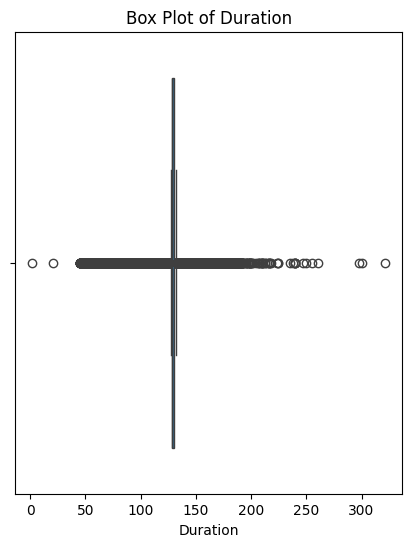

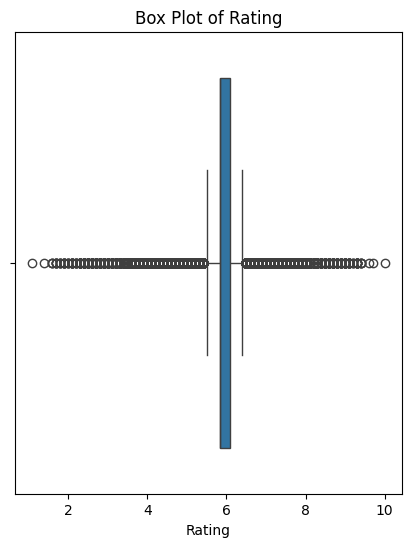

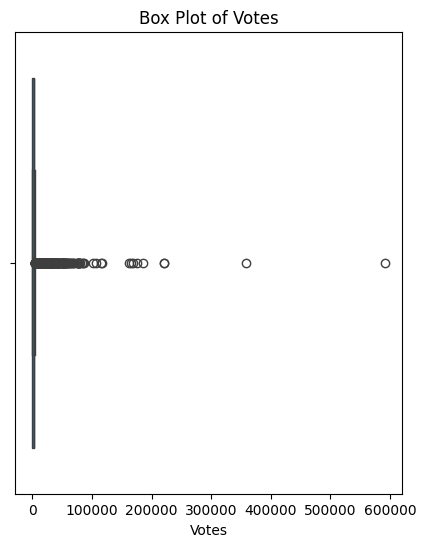

In [138]:
# Idendifying Outliers
for i in ['Year','Duration','Rating','Votes']:
    plt.figure(figsize=(5,6))
    sns.boxplot(x=df[i] )
    plt.title(f'Box Plot of {i}')
    plt.xlabel(i)
    plt.show()

In [139]:
# Handling Outliers
for i in ['Duration','Rating','Votes']:
  mean_value = df[i].mean()
  upper_limit = df[i].mean() + 3*df[i].std()
  lower_limit = df[i].mean() - 3*df[i].std()
  print('upper limit of',i,':', upper_limit)
  print('lower limit of',i,':', lower_limit)

upper limit of Duration : 188.11508585114422
lower limit of Duration : 68.820121457359
upper limit of Rating : 8.855398352380245
lower limit of Rating : 2.827844481310875
upper limit of Votes : 27244.405259894716
lower limit of Votes : -23367.364471916437


In [140]:
# Replace outliers with the mean value
df[i] = np.where((df[i] > upper_limit) | (df[i] < lower_limit), mean_value, df[i])

EXPLORATORY DATA ANALYSIS

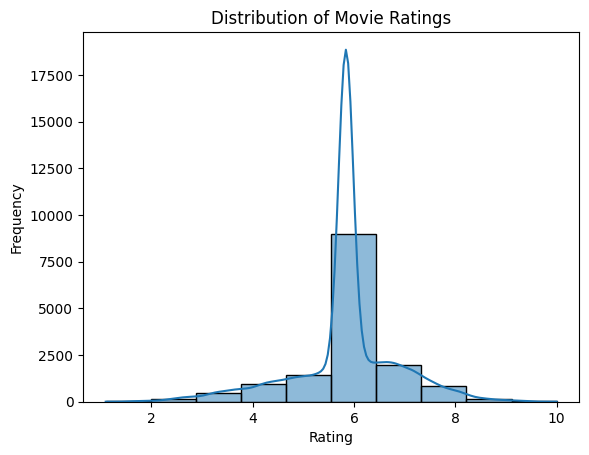

In [112]:
# Distribution of Movie Ratings
sns.histplot(df['Rating'], bins=10, kde=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.show()

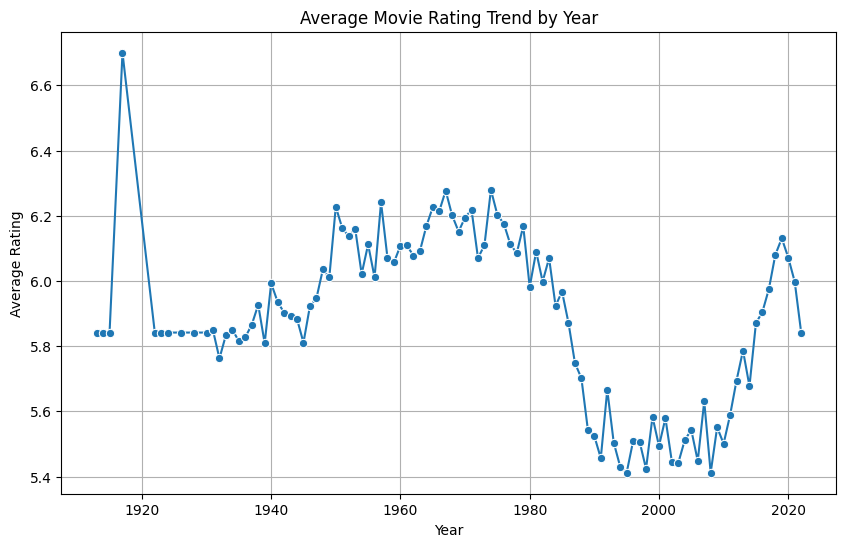

In [113]:
# Average Movie Rating Trend by Year
average_yearly_rating = df.groupby('Year')['Rating'].mean().reset_index()

# Plot the trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_yearly_rating, x='Year', y='Rating', marker='o')
plt.title('Average Movie Rating Trend by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

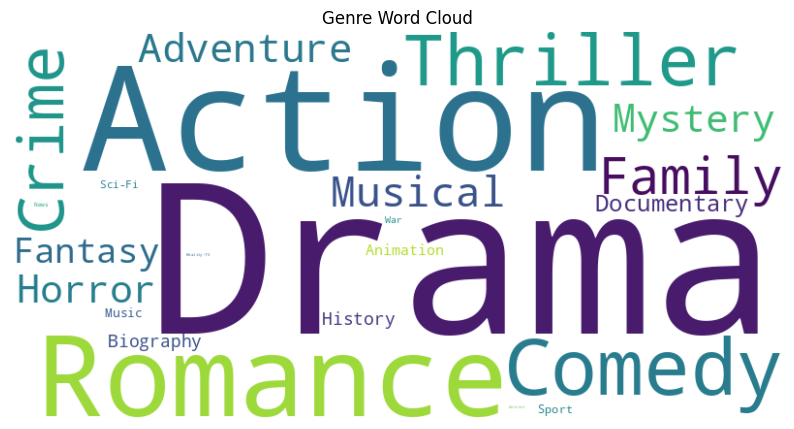

In [114]:
# Various Movie Genre
genre_counts = df['Genre'].str.split(', ', expand=True).stack().value_counts()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_counts)

#Plot
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genre Word Cloud')
plt.show()

In [115]:
# Genre counts
genre_counts = df['Genre'].value_counts()

# Creating a DataFrame from the genre counts
genre_df = genre_counts.reset_index()
genre_df.columns = ['Genre', 'count']

# Plot Treemap
fig = px.treemap(genre_df, path=['Genre'], values='count', title='Proportion Of Each Genre')
fig.show()

In [141]:
# Concatenate Actor 1, Actor 2, Actor 3 as actors
actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']]).dropna().value_counts()
actors.head()

,count
Pran,3027
Rekha,2339
Ashok Kumar,1715
Mithun Chakraborty,240
Dharmendra,230


In [142]:
df["Actor"] = df['Actor 1'] + ', ' + df['Actor 2'] + ', ' + df['Actor 3']
df["Directors"] = df['Director'].astype('category').cat.codes
df["Genres"] = df['Genre'].astype('category').cat.codes
df["Actors"] = df['Actor'].astype('category').cat.codes
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.000000,8.000000,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",1475,294,9361
2,#Homecoming,2021,90.0,"Drama, Musical",5.841621,1938.520394,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,"Sayani Gupta, Plabita Borthakur, Roy Angana",4884,345,10544
3,#Yaaram,2019,110.0,"Comedy, Romance",4.400000,35.000000,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",3170,224,8185
4,...And Once Again,2010,105.0,Drama,5.841621,1938.520394,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,"Rajat Kapoor, Rituparna Sengupta, Antara Mali",364,294,8705
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.700000,827.000000,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",3633,193,2494


<ipython-input-118-bbcf656defc7>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




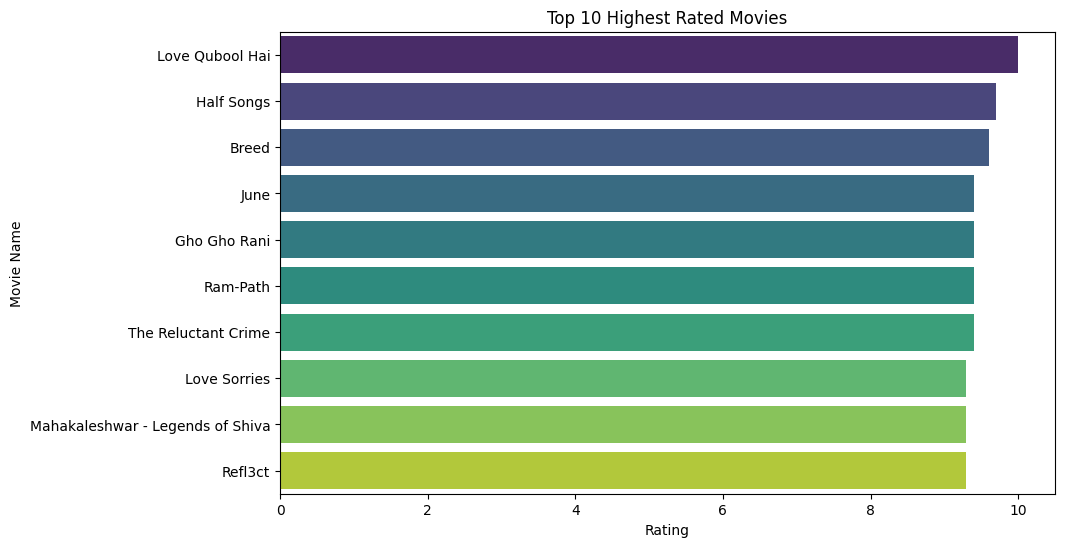

In [118]:
# Top 10 Highest Rated Movies
top_10_movies = df.sort_values(by='Rating', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='Name', data=top_10_movies, palette='viridis')
plt.title('Top 10 Highest Rated Movies')
plt.xlabel('Rating')
plt.ylabel('Movie Name')
plt.show()

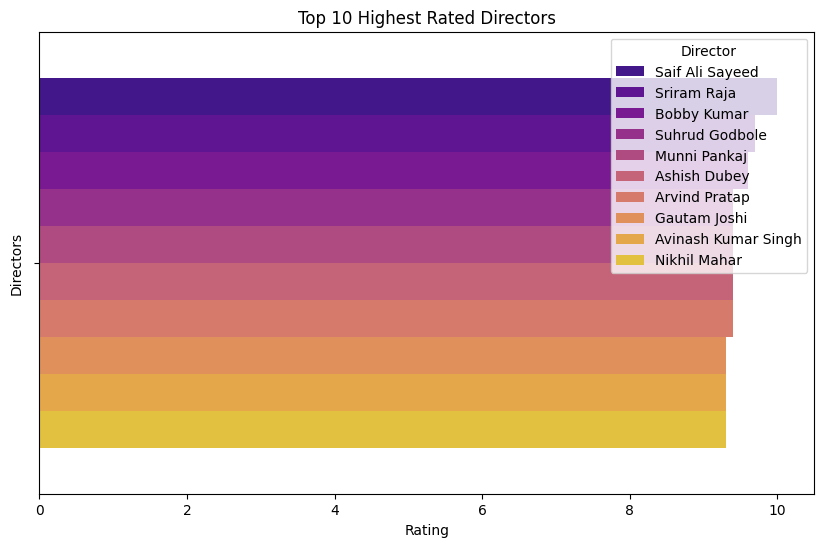

In [119]:
# Top 10 Highest Rated Directors
top_10_directors = df.sort_values(by='Rating', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', hue='Director', data=top_10_directors, palette='plasma')
plt.title('Top 10 Highest Rated Directors')
plt.xlabel('Rating')
plt.ylabel('Directors')
plt.show()

<ipython-input-120-1ff187e528d7>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




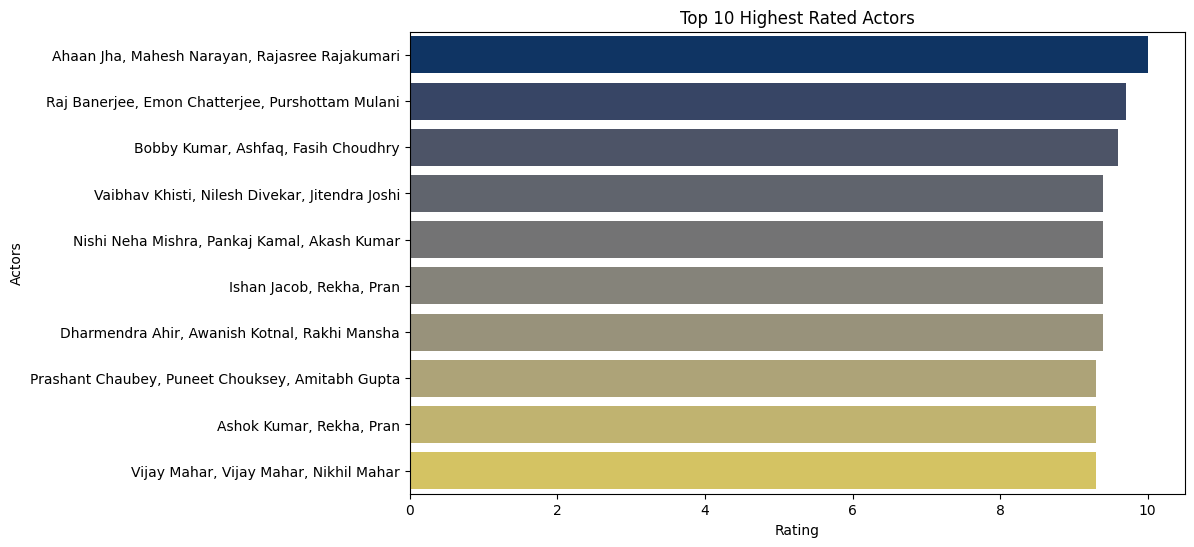

In [120]:
# Top 10 Highest Rated Actors
top_10_actors = df.sort_values(by='Rating', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='Actor', data=top_10_directors, palette='cividis')
plt.title('Top 10 Highest Rated Actors')
plt.xlabel('Rating')
plt.ylabel('Actors')
plt.show()

FEATURE SELECTION

In [143]:
df.drop(['Name','Actor 1','Actor 2','Actor 3','Actor','Director','Genre'], axis=1, inplace=True)
df.head()

,Year,Duration,Rating,Votes,Directors,Genres,Actors
1,2019,109.0,7.000000,8.000000,1475,294,9361
2,2021,90.0,5.841621,1938.520394,4884,345,10544
3,2019,110.0,4.400000,35.000000,3170,224,8185
4,2010,105.0,5.841621,1938.520394,364,294,8705
5,1997,147.0,4.700000,827.000000,3633,193,2494


STANDARISE VARIABLES

In [145]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df)
df1= pd.DataFrame(scaled, columns = df.columns)
df1.head()

,Year,Duration,Rating,Votes,Directors,Genres,Actors
0,1.258577,-0.979166,1.153122e+00,-0.632709,-0.799295,0.356209,0.846245
1,1.337268,-1.934812,1.768296e-15,0.202579,1.387512,0.714042,1.152306
2,1.258577,-0.928868,-1.435079e+00,-0.621026,0.288015,-0.134935,0.541996
3,0.904467,-1.180354,1.768296e-15,0.202579,-1.511979,0.356209,0.676528
4,0.392975,0.932127,-1.136441e+00,-0.278348,0.585020,-0.352441,-0.930355


In [147]:
# SPLITING THE DATASET
X = df1.drop(['Rating'],axis=1)
y = df1['Rating']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

MODEL SELECTION

In [160]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(),
    'K-Neighbors Regressor': KNeighborsRegressor(n_neighbors=5)
}

MODEL EVALUATION

In [175]:
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)*100
    mse = mean_squared_error(y_test, y_pred)
    cv_scores_r2 = cross_val_score(model, X, y, cv=5,scoring='r2')*100
    cv_scores_mse = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

    print(f"Model: {model_name}")
    print(f"R-squared = {r2:.2f}%")
    print(f"Mean Squared Error = {mse:.2f}")
    print(f"Cross-validated R-squared = {cv_scores_r2.mean():.2f}%")
    print(f"Cross-validated MSE = {cv_scores_mse.mean():.2f}\n")
    return

# Evaluate each model
for model_name, model in models.items():
  evaluate_model(model, X_train, y_train, X_test, y_test, model_name)

Model: Linear Regression
R-squared = 5.14%
Mean Squared Error = 0.89
Cross-validated R-squared = 4.28%
Cross-validated MSE = 0.96

Model: Random Forest
R-squared = 31.29%
Mean Squared Error = 0.65
Cross-validated R-squared = 31.78%
Cross-validated MSE = 0.68

Model: Gradient Boosting
R-squared = 30.36%
Mean Squared Error = 0.66
Cross-validated R-squared = 30.14%
Cross-validated MSE = 0.70

Model: Support Vector Regression
R-squared = 20.30%
Mean Squared Error = 0.75
Cross-validated R-squared = 19.13%
Cross-validated MSE = 0.81

Model: K-Neighbors Regressor
R-squared = 12.34%
Mean Squared Error = 0.83
Cross-validated R-squared = 12.26%
Cross-validated MSE = 0.88

